<a href="https://colab.research.google.com/github/IsagiYoichi640/Digit-Recognizer---1/blob/main/Digit_Recognizer_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import tensorflow.keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical


In [2]:
#load data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Data preproccesing

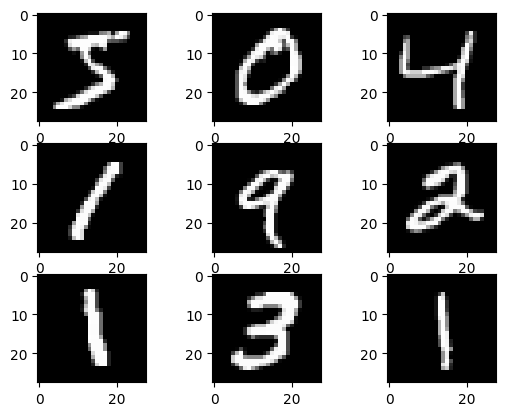

In [3]:
#plot first few images in ds
for i in range(9):
  #define subplot
  plt.subplot(330+1+i)
  plt.imshow(x_train[i],cmap=('gray'))
plt.show()

In [4]:
#reshape the training and testing data
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [5]:
#put data on y into categories
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [6]:
#convert the values to float
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [7]:
#normalize-pixelated
x_train=x_train/255
x_test=x_test/255

# Model building

In [8]:
#model parameters
batch_size=128
num_classes=10
epoch=15

In [9]:
#model
model=Sequential()

In [10]:
from keras.src.layers import input_spec
#build CNN
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#flatten layer
model.add(Flatten())
#dense layer
model.add(Dense(256,activation='relu'))
#output layer
model.add(Dense(num_classes,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,387,594 (5.29 MB)

 Trainable params: 1,387,594 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

# model copilation

In [12]:
opt=SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

# model training

In [13]:
hist=model.fit(x_train,y_train,batch_size=batch_size,epochs=epoch,verbose=1,validation_data=(x_test,y_test))
print('model trained succesfully')

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.8717 - loss: 0.4116 - val_accuracy: 0.9709 - val_loss: 0.0892
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 72ms/step - accuracy: 0.9810 - loss: 0.0665 - val_accuracy: 0.9812 - val_loss: 0.0539
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 104ms/step - accuracy: 0.9878 - loss: 0.0403 - val_accuracy: 0.9866 - val_loss: 0.0371
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.9907 - loss: 0.0287 - val_accuracy: 0.9838 - val_loss: 0.0475
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.9942 - loss: 0.0194 - val_accuracy: 0.9850 - val_loss: 0.0419
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.9957 - loss: 0.0140 - val_accuracy: 0.9870 - val_loss: 0.0377
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 71ms/step - accuracy: 0.9976 - loss: 0.0087 - val_accuracy: 0.9888 - val_loss: 0.0346
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9982 - loss: 0.0060 -

In [22]:
#save model
model.save("h.h5")


# model evaluation


In [14]:
score=model.evaluate(x_test,y_test,verbose=0)
print("Test Loss:", score[0])
print("test accuracy:",score[1])

Test Loss: 0.0485302172601223
test accuracy: 0.9887999892234802


# build digit recognizer

In [18]:
import numpy as np
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
from google.colab import files


In [29]:
file=files.upload()

Saving download (1).png to download (1).png


In [26]:
#load and prepare the img
def load_image(filename):
  img=load_img(filename,target_size=(28,28),color_mode='grayscale')
  #convert it into array
  img=img_to_array(img)
  #reshape the array for neural network
  img=img.reshape(1,28,28,1)
  #convert the data into puxels
  img=img.astype('float32')
  img=img/255.0
  return img


In [31]:
def example():
  # Load the image in grayscale and resize to 28x28
  img = load_img('/content/download (1).png', target_size=(28, 28), color_mode='grayscale')

  # Convert to array and preprocess (reshape and normalize)
  img = img_to_array(img)
  img = img.reshape(1, 28, 28, 1)
  img = img.astype('float32') / 255.0

  # Load model - fixed typo: changed '-' to '='
  model = load_model('h.h5')

  # Recognize the digit
  digit = model.predict(img)
  predicted_value = argmax(digit)
  print('recognized digit:', predicted_value)

example()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
recognized digit: 7
